In [283]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [284]:
import sys
sys.path.append('..')
from lib.vis import plot_session_intervals
from lib.course import LECTURES, ASSIGNMENTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pprint 

In [285]:
lecture = LECTURES[1]
df = lecture.viewing_data()

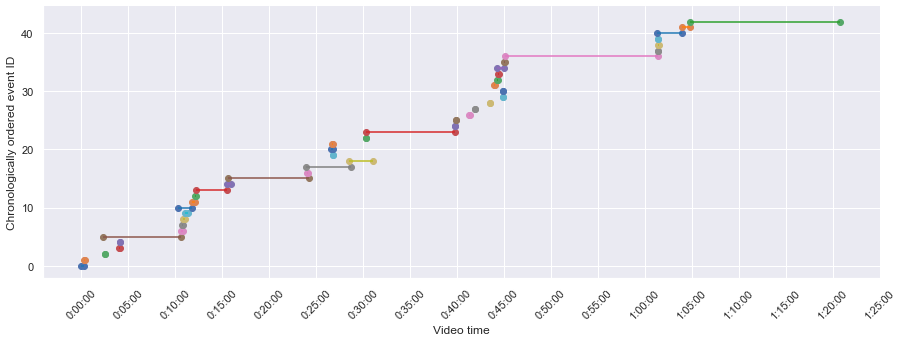

In [286]:
user_ids = df['user'].unique()
plot_session_intervals(df[df['user'] == user_ids[0]])

In [287]:
vd = pd.concat([l.viewing_data() for l in LECTURES])

,time,start,minutes,user,end,lecture,date
0,2019-09-23 21:48:19,0.000000,0.124773,c799d499-6e22-4882-b6fd-67590919c0fe,7.486403,1,2019-09-23
1,2019-09-23 21:48:19,39.827988,0.099284,c799d499-6e22-4882-b6fd-67590919c0fe,45.785032,1,2019-09-23
2,2019-09-23 21:48:19,168.563504,0.017356,c799d499-6e22-4882-b6fd-67590919c0fe,169.604871,1,2019-09-23
3,2019-09-23 21:48:19,160.339947,1.506594,c799d499-6e22-4882-b6fd-67590919c0fe,250.735588,1,2019-09-23
4,2019-09-23 21:49:49,4425.160217,0.029089,c799d499-6e22-4882-b6fd-67590919c0fe,4426.905585,1,2019-09-23
...,...,...,...,...,...,...,...
919,2019-11-15 00:22:32,2691.249116,0.713629,25fba90a-8b98-4410-b050-aafe000ddfcd,2734.066873,16,2019-11-15
920,2019-11-15 00:41:32,2734.624523,2.656539,25fba90a-8b98-4410-b050-aafe000ddfcd,2894.016839,16,2019-11-15
921,2019-11-15 00:52:02,2894.131361,0.221248,25fba90a-8b98-4410-b050-aafe000ddfcd,2907.406247,16,2019-11-15
922,2019-11-15 00:52:02,2907.510747,29.022435,25fba90a-8b98-4410-b050-aafe000ddfcd,4648.856872,16,2019-11-15


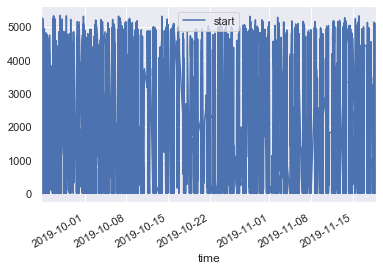

In [288]:
vd.plot("time", "start")

vd["date"] = vd.time.dt.date

vd

In [289]:
def day_to_string(day):
    days = ["M", " T", "W", "T", "F", "S", "S"]
    return days[day]

Text(0.5, 1, 'When, and for how many minutes, do students consume lecture material?')

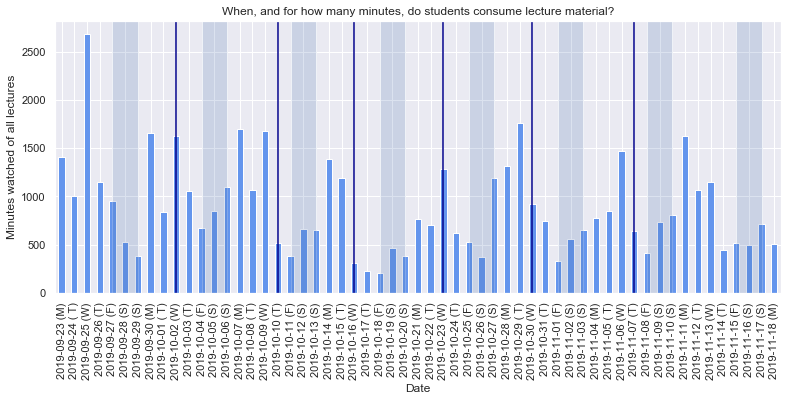

In [290]:
""" How does the classroom engage with lectures? Highlights weekends
"""

from datetime import date

# Creates axis and plots
ax = vd.groupby("date").sum().plot.bar(y="minutes", rot=90, figsize=(13, 5), legend=False, color='cornflowerblue')

# Popultes information in the ticks such that they aren't empty strings
plt.draw()
# Get labels and format them
labels = [item.get_text() + " (" + day_to_string(dt.datetime.strptime(item.get_text(),'%Y-%m-%d').weekday()) + ")" for item in ax.get_xticklabels()]
# Print labels
ax.set_xticklabels(labels)
# Draw background color on the weekends
ticks = ax.get_xticks()
for i in range(int(len(ticks)/7)):
    plt.axvspan((i*7)+4, (i*7)+6, facecolor='b', alpha=0.2)

# Compute assignment deadline with respect to the first lecture date (ax plots lines using indexes)
for assignment in ASSIGNMENTS:
    delta = assignment.duedate - LECTURES[0].date 
    ax.axvline(x=delta.days, color='darkblue')

# Add title, x-label, y-label
ax.set_xlabel('Date')
ax.set_ylabel('Minutes watched of all lectures')
ax.set_title('When, and for how many minutes, do students consume lecture material?')
    

Text(0.5, 1, 'When, and for how many minutes, do students consume lecture material?')

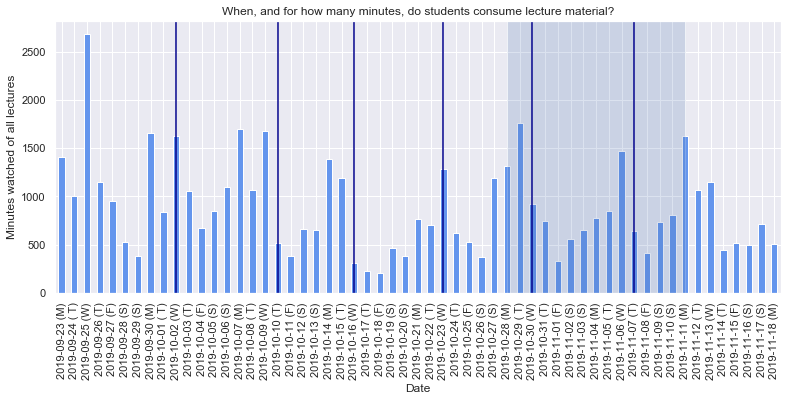

In [291]:
""" How does the classroom engage with lectures? 
    Highlights midterm season, assuming midterms take place on weeke 5-7
"""

from datetime import date

# Creates axis and plots
ax = vd.groupby("date").sum().plot.bar(y="minutes", rot=90, figsize=(13, 5), legend=False, color='cornflowerblue')

# Popultes information in the ticks such that they aren't empty strings
plt.draw()
# Get labels and format them
labels = [item.get_text() + " (" + day_to_string(dt.datetime.strptime(item.get_text(),'%Y-%m-%d').weekday()) + ")" for item in ax.get_xticklabels()]
# Print labels
ax.set_xticklabels(labels)
# Draw background color on the midterm season
start = 35
end = start + 14
plt.axvspan(start, end, facecolor='b', alpha=0.2)

# Compute assignment deadline with respect to the first lecture date (ax plots lines using indexes)
for assignment in ASSIGNMENTS:
    delta = assignment.duedate - LECTURES[0].date 
    ax.axvline(x=delta.days, color='darkblue')

# Add title, x-label, y-label
ax.set_xlabel('Date')
ax.set_ylabel('Minutes watched of all lectures')
ax.set_title('When, and for how many minutes, do students consume lecture material?')
    

Text(0.5, 0.98, '')

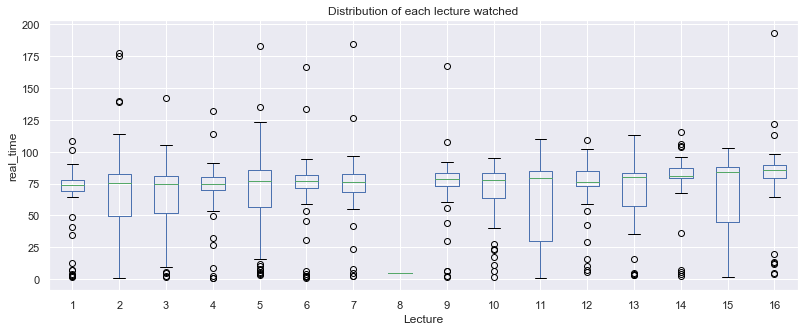

In [292]:
""" What is the distribution of minutes watched per lecture? 
    TODO: Buggy, right now I am computing the sum of the end time - sum of the start times, not coverage. 
        Look at what Will did on vis.py
"""

df = vd.groupby(["lecture", "user"]).sum().reset_index()
df['real_time'] = (df['end'] - df['start'])/60
ax = df[df.real_time > 1].boxplot('real_time', by='lecture', figsize=(13, 5))

# Add title, x-label, y-label
ax.set_xlabel('Lecture')
ax.set_ylabel('real_time')
ax.set_title('Distribution of each lecture watched')
# ax.set_ylim(0,3)

# get rid of the automatic 'Boxplot grouped by lecture' title
plt.suptitle("")

In [293]:
df = vd
df['date'] = [dt.datetime.date(d) for d in df['time']] 
df2 = df.groupby(['lecture', 'date']).sum()
df2 = df2.reset_index()

# pivot_df = df2.pivot(index='date', columns='lecture', values='minutes')
# pivot_df
# .plot(kind='bar', stacked=True, )

In [294]:
pivot_df = df2.pivot(index='date', columns='lecture', values='minutes')
pivot_df

lecture,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
date,,,,,,,,,,,,,,,,
2019-09-23,1405.976394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-24,1008.195339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-25,682.850053,2001.269080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-26,53.002538,1101.610593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-27,200.652770,755.856362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-28,30.445974,498.495946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-29,151.454439,235.638644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30,85.564244,536.717452,1031.914472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,64.244166,300.510143,473.910869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
pivot_df = pivot_df.fillna(0)
pivot_df

lecture,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
date,,,,,,,,,,,,,,,,
2019-09-23,1405.976394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-24,1008.195339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-25,682.850053,2001.269080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-26,53.002538,1101.610593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-27,200.652770,755.856362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-28,30.445974,498.495946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-29,151.454439,235.638644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-30,85.564244,536.717452,1031.914472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-01,64.244166,300.510143,473.910869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [296]:
# [:, inclusive:exclusive] hardcoded
pivot_df['assignment_1'] = pivot_df.iloc[:, 2:3].sum(axis=1)
pivot_df['assignment_2'] = pivot_df.iloc[:, 3:5].sum(axis=1)
pivot_df['assignment_3'] = pivot_df.iloc[:, 5:7].sum(axis=1)
pivot_df['assignment_4'] = pivot_df.iloc[:, 6:8].sum(axis=1)
pivot_df['assignment_5'] = pivot_df.iloc[:, 9:12].sum(axis=1)
pivot_df['assignment_6'] = pivot_df.iloc[:, 12:13].sum(axis=1)
pivot_df

lecture,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,assignment_1,assignment_2,assignment_3,assignment_4,assignment_5,assignment_6
date,,,,,,,,,,,,,,,,,,,,,
2019-09-23,1405.976394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-24,1008.195339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-25,682.850053,2001.269080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-26,53.002538,1101.610593,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-27,200.652770,755.856362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-28,30.445974,498.495946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-29,151.454439,235.638644,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-09-30,85.564244,536.717452,1031.914472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1031.914472,0.000000,0.000000,0.000000,0.000000,0.000000
2019-10-01,64.244166,300.510143,473.910869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,473.910869,0.000000,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1, 'Class progression per day by assignment')

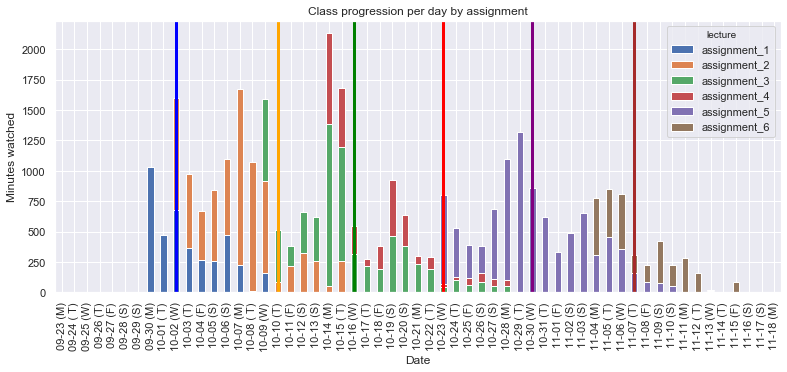

In [297]:
ax = pivot_df.loc[:,['assignment_1','assignment_2','assignment_3', 'assignment_4', 'assignment_5', 'assignment_6']].plot.bar(stacked=True, figsize=(13,5))

# Popultes information in the ticks such that they aren't empty strings
plt.draw()
# Get labels and format them
labels = [item.get_text()[5:] + " (" + day_to_string(dt.datetime.strptime(item.get_text(),'%Y-%m-%d').weekday()) + ")" for item in ax.get_xticklabels()]
# Print labels
ax.set_xticklabels(labels)
  
# Assignment lines hardcoded
ax.axvline(x=9, linewidth=3, color='blue')
ax.axvline(x=17, linewidth=3, color='orange')
ax.axvline(x=23, linewidth=3, color='green')
ax.axvline(x=30, linewidth=3, color='red')
ax.axvline(x=37, linewidth=3, color='purple')
ax.axvline(x=45, linewidth=3, color='brown')

# Add title, x-label, y-label
ax.set_xlabel('Date')
ax.set_ylabel('Minutes watched')
ax.set_title('Class progression per day by assignment')

Text(0.5, 1, 'Class progression per day by assignment')

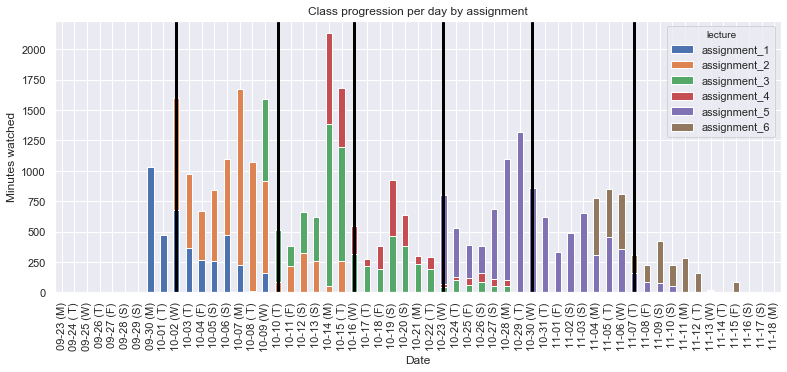

In [298]:
ax = pivot_df.loc[:,['assignment_1','assignment_2','assignment_3', 'assignment_4', 'assignment_5', 'assignment_6']].plot.bar(stacked=True, figsize=(13,5))

# Popultes information in the ticks such that they aren't empty strings
plt.draw()
# Get labels and format them
labels = [item.get_text()[5:] + " (" + day_to_string(dt.datetime.strptime(item.get_text(),'%Y-%m-%d').weekday()) + ")" for item in ax.get_xticklabels()]
# Print labels
ax.set_xticklabels(labels)

for assignment in ASSIGNMENTS:
    delta = assignment.duedate - LECTURES[0].date
    ax.axvline(x=delta.days, linewidth=3, color='black')

# Add title, x-label, y-label
ax.set_xlabel('Date')
ax.set_ylabel('Minutes watched')
ax.set_title('Class progression per day by assignment')

Text(0.5, 1, 'Class progression per day by assignment')

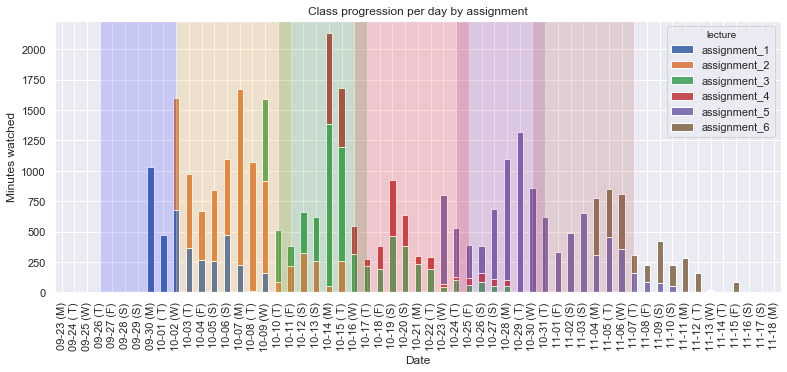

In [299]:
ax = pivot_df.loc[:,['assignment_1','assignment_2','assignment_3', 'assignment_4', 'assignment_5', 'assignment_6']].plot.bar(stacked=True, figsize=(13,5))

# Popultes information in the ticks such that they aren't empty strings
plt.draw()
# Get labels and format them
labels = [item.get_text()[5:] + " (" + day_to_string(dt.datetime.strptime(item.get_text(),'%Y-%m-%d').weekday()) + ")" for item in ax.get_xticklabels()]
# Print labels
ax.set_xticklabels(labels)

# Draw background color on the midterm season
plt.axvspan(3, 9, facecolor='blue', alpha=0.15)
plt.axvspan(9, 18, facecolor='orange', alpha=0.15)
plt.axvspan(17, 24, facecolor='green', alpha=0.15)
plt.axvspan(23, 32, facecolor='red', alpha=0.15)
plt.axvspan(31, 38, facecolor='purple', alpha=0.15)
plt.axvspan(37, 45, facecolor='brown', alpha=0.15)

# Add title, x-label, y-label
ax.set_xlabel('Date')
ax.set_ylabel('Minutes watched')
ax.set_title('Class progression per day by assignment')